In [3]:
# ---------------------------------------------
# Wine Dataset Analysis Step-by-Step
# ---------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# ---------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["class"] = wine.target

print("Wine Dataset Loaded Successfully")



Wine Dataset Loaded Successfully


In [4]:
# ---------------------------------------------
# 1. Display Basic Statistics
# ---------------------------------------------
print("\n===== BASIC STATISTICS =====")
print(df.describe())




===== BASIC STATISTICS =====
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453      

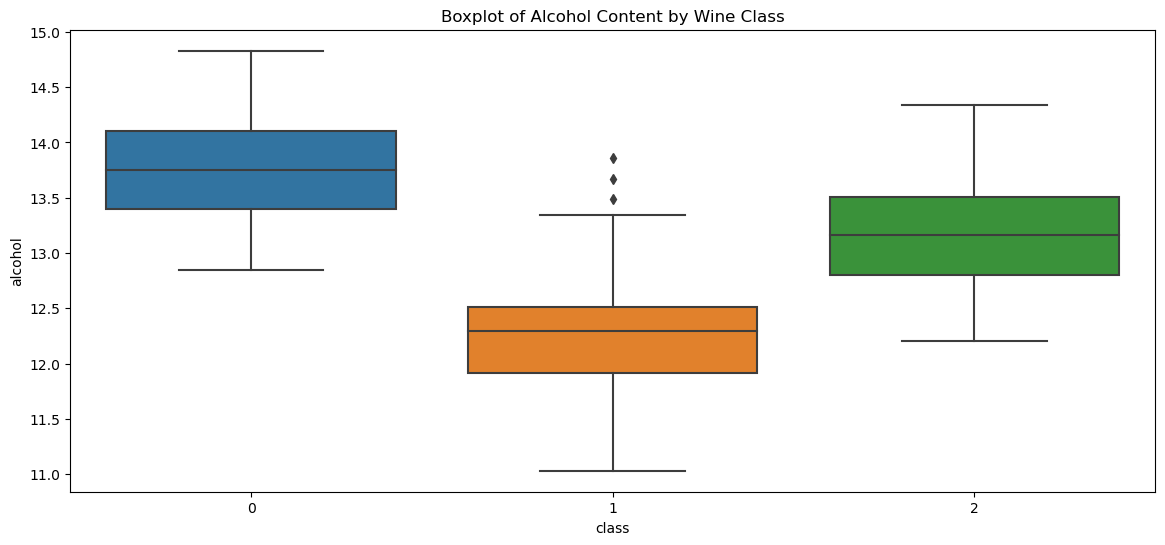

In [5]:
# ---------------------------------------------
# 2. Boxplot by output labels/classes
# ---------------------------------------------
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="class", y="alcohol")
plt.title("Boxplot of Alcohol Content by Wine Class")
plt.show()



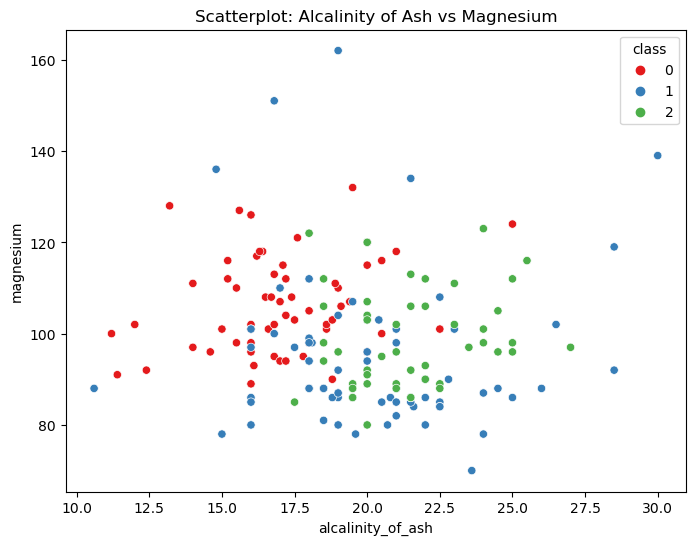

In [6]:
# ---------------------------------------------
# 3. Scatterplot using two variables
# ---------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="alcalinity_of_ash", y="magnesium", hue="class", palette="Set1")
plt.title("Scatterplot: Alcalinity of Ash vs Magnesium")
plt.show()



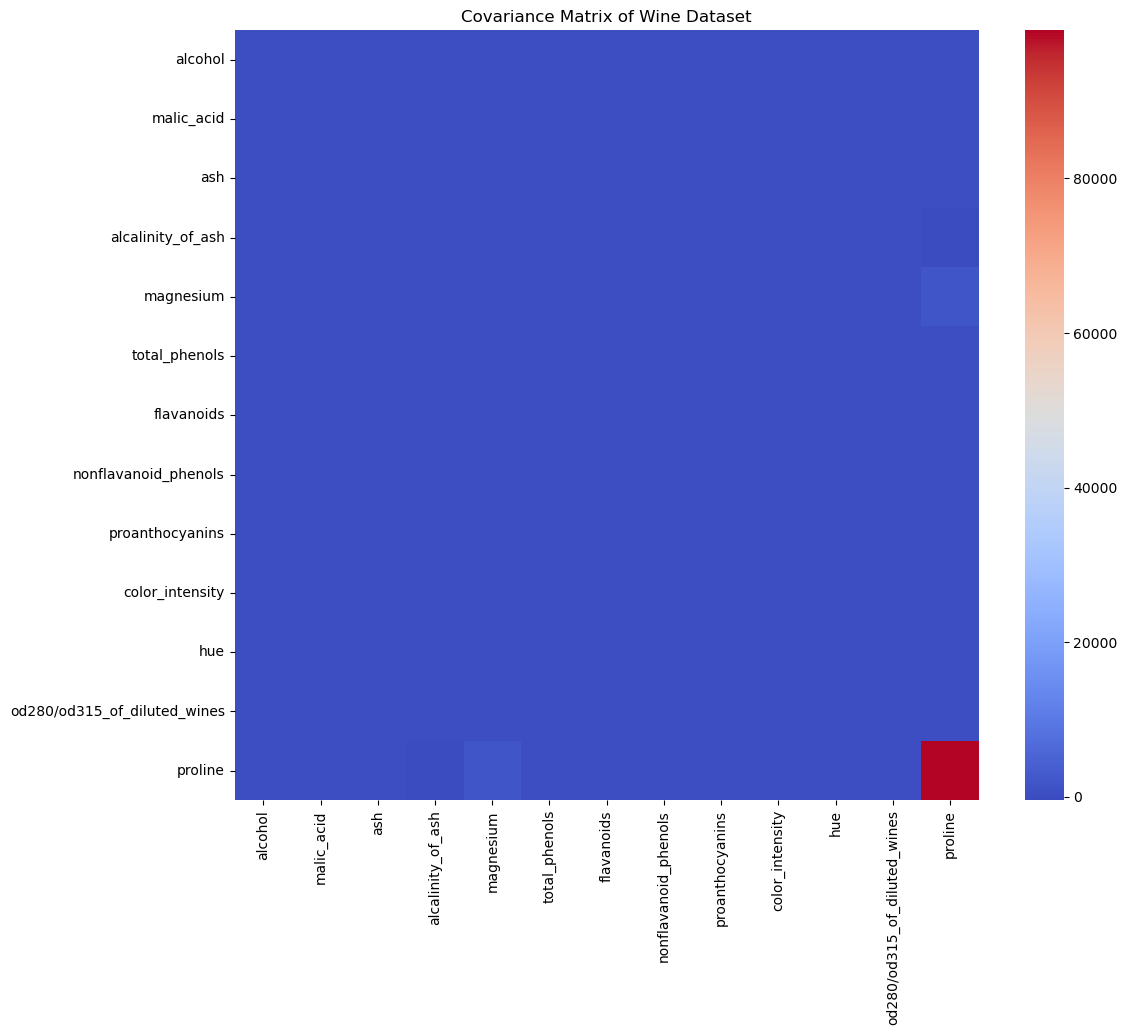

In [7]:
# ---------------------------------------------
# 4. Plot Covariance Matrix
# ---------------------------------------------
plt.figure(figsize=(12,10))
corr_matrix = df.iloc[:, :-1].cov()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Covariance Matrix of Wine Dataset")
plt.show()



In [8]:
# ---------------------------------------------
# 5. Data Scaling
# ---------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

print("\nData Scaling Completed. Mean of scaled features ≈", X_scaled.mean())




Data Scaling Completed. Mean of scaled features ≈ 4.66735072755122e-16


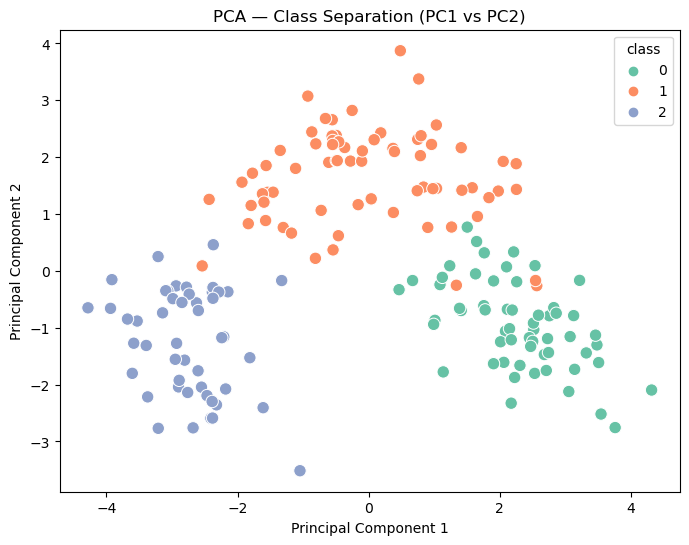


Explained Variance Ratio: [0.36198848 0.1920749 ]


In [9]:
# ---------------------------------------------
# 6. PCA for Better Class Separation
# ---------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df["class"] = df["class"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="class", palette="Set2", s=80)
plt.title("PCA — Class Separation (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
